In [3]:
import pandas as pd

# Cargar el dataset desde URL
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Ver columnas y tipos de datos
df.info()

# Ver cuántas opiniones hay de cada tipo
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


label
0    29720
1     2242
Name: count, dtype: int64

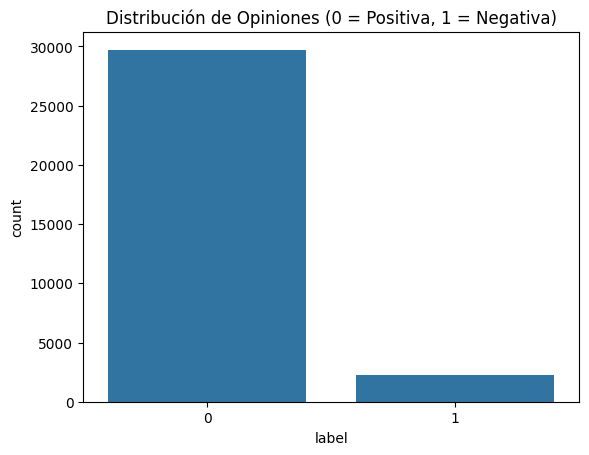

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribución de Opiniones (0 = Positiva, 1 = Negativa)')
plt.show()



In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def limpiar_tweet(texto):
    texto = texto.lower()  # minusculas
    texto = re.sub(r'@[A-Za-z0-9_]+', '', texto)  # eliminar menciones
    texto = re.sub(r'http\S+', '', texto)  # eliminar URLs
    texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)  # eliminar caracteres no alfabéticos (con acentos)
    texto = re.sub(r'\s+', ' ', texto).strip()  # eliminar espacios extra
    return texto


In [21]:
df['tweet_limpio'] = df['tweet'].apply(limpiar_tweet)
df[['tweet', 'tweet_limpio']].head()


,tweet,tweet_limpio
0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,factsguide: society now #motivation,factsguide society now motivation


In [22]:
import nltk

# Fuerza descarga en una ubicación estándar
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar stopwords (si no las tienes)
nltk.download('stopwords')
nltk.download('punkt')

# Definir lista de stopwords en inglés
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
from nltk.tokenize import word_tokenize

def tokenizar_y_filtrar(texto):
    palabras = word_tokenize(texto, preserve_line=True)
    palabras_filtradas = [w for w in palabras if w not in stop_words]
    return " ".join(palabras_filtradas)

# Aplicar al DataFrame
df['tokens'] = df['tweet_limpio'].apply(tokenizar_y_filtrar)
df[['tweet_limpio', 'tokens']].head()


,tweet_limpio,tokens
0,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drags kids dysfun...
1,thanks for lyft credit i cant use cause they d...,thanks lyft credit cant use cause dont offer w...
2,bihday your majesty,bihday majesty
3,model i love u take with u all the time in ur,model love u take u time ur
4,factsguide society now motivation,factsguide society motivation


In [25]:
# Unir tokens en un solo string por fila
df['tokens_joined'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Eliminar filas vacías después de unir
df = df[df['tokens_joined'].str.strip() != '']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tokens_joined'])

print("Forma de la matriz TF-IDF:", X.shape)


Forma de la matriz TF-IDF: (31930, 39616)
